<div style="background-color:#bcd6e3; padding:15px; border-radius:10px;">
    <h1 style="color:darkblue; font-family:Verdana;">🚣‍♂️ Python Project: Project Introduction</h1>
    <p>The files contain data collected during an ergometer competition (rowing machine). The competition is organized as follows:</p>
    <ul>
        <li>Each series has 4 rowers who will row 2000 virtual meters on their machines.</li>
        <li>The goal is to be as fast as possible over the 2000 meters.</li>
        <li>Data for each series is recorded by the machines and collected.</li>
        <li>The races are configured so that each 2000m course is divided into four 500m segments.</li>
        <li>Statistics provided by the ergometers are calculated and recorded every 500m.</li>
        <li>Each file in the zip corresponds to one race series.</li>
    </ul>
    <h2 style="color:darkblue; font-family:Verdana;">📌 Project Participants:</h2>
    <ul>
        <li>Ecem BAYINDIR</li>
        <li>Kenny NUNGU</li>
        <li>Traore ISSAKA MOUSSA</li>
        <li>Juste BOTTHY</li>
    </ul>
    <h2 style="color:darkblue; font-family:Verdana;">🔗 View the Streamlit Dashboard:</h2>
    <p style="font-family:Verdana; font-size:16px;"><a href="https://roweranalysisproject.streamlit.app/" target="_blank" style="color:blue; text-decoration:underline;">Click here to access the Streamlit dashboard</a></p>
</div>


<div style="background-color:#e8e8e8; padding:15px; border-radius:10px;">
    <h3 style="color:darkblue; font-family:Verdana;">Question No. 1: Rowers' Performance Analysis</h3>
    <p>Extract the data from the files and place it in a table showing each rower's performance, including the following:</p>
    <ul>
        <li>Their time for 2000m</li>
        <li>Average stroke rate over 2000m</li>
        <li>Number of strokes over 2000m</li>
        <li>The time for each 500m segment</li>
        <li>Average stroke rate for each 500m segment</li>
        <li>Number of strokes for each 500m segment</li>
    </ul>
</div>

### Import libraries


In [5]:
import json
import pandas as pd
import os
import glob

### The function that reads JSON files and returns a structured DataFrame

In [7]:
def extract_participant_performance(participant, series):
    total_stroke_count = sum([split.get('split_stroke_count', 0) for split in participant.get('splits', [])])
    
    return {
        'series': series,
        'participant': participant.get('participant', None),
        'calories': participant.get('calories', None),  # Added calories field
        'total_time_2000m': participant.get('score', None),  
        'avg_spm_2000m': participant.get('spm', None),  
        'total_strokes_2000m': total_stroke_count,  
        'split_time_500m_1': participant['splits'][0].get('split_time', None) if len(participant.get('splits', [])) > 0 else None,
        'split_spm_500m_1': participant['splits'][0].get('split_stroke_rate', None) if len(participant.get('splits', [])) > 0 else None,
        'split_strokes_500m_1': participant['splits'][0].get('split_stroke_count', None) if len(participant.get('splits', [])) > 0 else None,
        'split_time_500m_2': participant['splits'][1].get('split_time', None) if len(participant.get('splits', [])) > 1 else None,
        'split_spm_500m_2': participant['splits'][1].get('split_stroke_rate', None) if len(participant.get('splits', [])) > 1 else None,
        'split_strokes_500m_2': participant['splits'][1].get('split_stroke_count', None) if len(participant.get('splits', [])) > 1 else None,
        'split_time_500m_3': participant['splits'][2].get('split_time', None) if len(participant.get('splits', [])) > 2 else None,
        'split_spm_500m_3': participant['splits'][2].get('split_stroke_rate', None) if len(participant.get('splits', [])) > 2 else None,
        'split_strokes_500m_3': participant['splits'][2].get('split_stroke_count', None) if len(participant.get('splits', [])) > 2 else None,
        'split_time_500m_4': participant['splits'][3].get('split_time', None) if len(participant.get('splits', [])) > 3 else None,
        'split_spm_500m_4': participant['splits'][3].get('split_stroke_rate', None) if len(participant.get('splits', [])) > 3 else None,
        'split_strokes_500m_4': participant['splits'][3].get('split_stroke_count', None) if len(participant.get('splits', [])) > 3 else None,
    }

def add_data_to_dataframe(file_path, series, df=None):
    if df is None:
        df = pd.DataFrame() 

    print(f"Reading file: {file_path}")
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            participants = data.get('results', {}).get('participants', [])
            all_data = [extract_participant_performance(participant, series) for participant in participants]
            df = pd.concat([df, pd.DataFrame(all_data)], ignore_index=True)  
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

    return df


In [8]:
# Base path and folder name with potential space at the end
base_path = "/Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python"
test_folder = "Test "

# Correctly joining the path components to avoid path issues
file_paths = [
    (os.path.join(base_path, test_folder, "Progressif.json"), "0"),
    (os.path.join(base_path, test_folder, "Série 1(0001).json"), "1"),
    (os.path.join(base_path, test_folder, "Série 2.json"), "2"),
    (os.path.join(base_path, test_folder, "Série 3.json"), "3"),
    (os.path.join(base_path, test_folder, "Série 4.json"), "4"),
    (os.path.join(base_path, test_folder, "Série 5.json"), "5"),
    (os.path.join(base_path, test_folder, "Série 6.json"), "6"),
    (os.path.join(base_path, test_folder, "Série 7.json"), "7")
]

# Launching an empty DataFrame
merged_series = None

# We process each file and add the data to the DataFrame
for file_path, series in file_paths:
    merged_series = add_data_to_dataframe(file_path, series, merged_series)

Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Progressif.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 1(0001).json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 2.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 3.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 4.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 5.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 6.json
Reading file: /Users/ecembayindir/Desktop/SORBONNE/October 2024/Python-Benoit Grand/projet_python/Test /Série 7.json


In [9]:
# Check the DataFrame table
merged_series

,series,participant,calories,total_time_2000m,avg_spm_2000m,total_strokes_2000m,split_time_500m_1,split_spm_500m_1,split_strokes_500m_1,split_time_500m_2,split_spm_500m_2,split_strokes_500m_2,split_time_500m_3,split_spm_500m_3,split_strokes_500m_3,split_time_500m_4,split_spm_500m_4,split_strokes_500m_4
0,0,Maxime,171,6:33.4,28,186,1016,26,44,1020,25,43,976,29,47,921,34,52
1,0,Célestin,154,7:01.8,28,199,1031,27,46,1069,25,44,1073,28,50,1044,34,59
2,0,Julien,135,7:47.0,26,210,1164,25,48,1205,24,49,1152,28,54,1148,31,59
3,0,Neve,128,8:12.4,27,229,1235,26,54,1272,25,52,1228,28,58,1188,33,65
4,1,Eric,131,7:57.3,27,219,1194,28,56,1212,26,53,1212,27,54,1155,29,56
5,1,Edouard,130,8:03.7,30,242,1148,31,59,1255,29,60,1253,29,61,1181,31,62
6,1,Baptiste,125,8:21.1,24,208,1186,27,53,1254,24,50,1307,23,49,1265,27,56
7,1,Loïs,124,8:24.1,30,254,1191,31,61,1302,29,62,1294,30,65,1254,32,66
8,2,Usama,134,7:54.8,27,214,1128,28,53,1223,26,53,1231,25,52,1167,29,56
9,2,Noé,130,8:05.8,34,280,1157,35,68,1236,33,67,1246,34,71,1219,36,74


In [10]:
# Check the DataFrame size
merged_series.shape

(32, 18)

In [11]:
merged_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   series                32 non-null     object
 1   participant           32 non-null     object
 2   calories              32 non-null     int64 
 3   total_time_2000m      32 non-null     object
 4   avg_spm_2000m         32 non-null     int64 
 5   total_strokes_2000m   32 non-null     int64 
 6   split_time_500m_1     32 non-null     int64 
 7   split_spm_500m_1      32 non-null     int64 
 8   split_strokes_500m_1  32 non-null     int64 
 9   split_time_500m_2     32 non-null     int64 
 10  split_spm_500m_2      32 non-null     int64 
 11  split_strokes_500m_2  32 non-null     int64 
 12  split_time_500m_3     32 non-null     int64 
 13  split_spm_500m_3      32 non-null     int64 
 14  split_strokes_500m_3  32 non-null     int64 
 15  split_time_500m_4     32 non-null     int6

<div style="background-color:#e8e8e8; padding:15px; border-radius:10px;">
    <h3 style="color:darkblue; font-family:Verdana;">Question No. 2: Speed and Stroke Length Analysis</h3>
    <p>For each participant, calculate the following metrics:</p>
    <ul>
        <li><strong>Average speed in km/h over 2000m</strong>: Convert the total time for 2000m to hours and the distance to kilometers, then calculate the average speed using the formula <em>speed = distance / time</em>.</li>
        <li><strong>Average speed in km/h over each 500m section</strong>: For each 500m segment, convert the time to hours and calculate the speed in km/h for each section.</li>
        <li><strong>Average stroke length (meters per stroke) over 2000m</strong>: Calculate the distance covered per stroke for the entire 2000m using the formula <em>distance / total strokes</em>.</li>
        <li><strong>Average stroke length (meters per stroke) over each 500m section</strong>: For each 500m segment, calculate the distance covered per stroke using the formula <em>distance / strokes for that segment</em>.</li>
    </ul>
</div>


In [13]:
# Calculate the average speed in km/h for 20000m
# Step 1: Function to convert time string to seconds
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        parts = time_str.split(':')
        minutes = int(parts[0])
        seconds = float(parts[1])
        total_seconds = minutes * 60 + seconds
        return total_seconds
    return None

In [14]:
# Step 2: Apply the conversion function to the 'total_time_2000m' column
merged_series["total_time_2000m_seconds"] = merged_series["total_time_2000m"].apply(time_to_seconds)

# Step 3: Calculate average speed in km/h using the corrected time in seconds
# Distance for each section is 2 km
merged_series["avg_speed_2000"] = (2 / (merged_series["total_time_2000m_seconds"] / 3600))

In [15]:
# Preview the updated DataFrame 
print(merged_series[["total_time_2000m", "total_time_2000m_seconds", "avg_speed_2000"]].head())

  total_time_2000m  total_time_2000m_seconds  avg_speed_2000
0           6:33.4                     393.4       18.301983
1           7:01.8                     421.8       17.069701
2           7:47.0                     467.0       15.417559
3           8:12.4                     492.4       14.622258
4           7:57.3                     477.3       15.084852


In [16]:
# Calculate the average speed in km/h for each 500m section
# Distance for each section is 0.5 km

# Directly use the split time columns, which are already in seconds
merged_series["avg_speed_500m_1"] = (0.5 / (merged_series["split_time_500m_1"] / 36000))
merged_series["avg_speed_500m_2"] = (0.5 / (merged_series["split_time_500m_2"] / 36000))
merged_series["avg_speed_500m_3"] = (0.5 / (merged_series["split_time_500m_3"] / 36000))
merged_series["avg_speed_500m_4"] = (0.5 / (merged_series["split_time_500m_4"] / 36000))


In [17]:
# Preview the updated DataFrame to check the calculations
print(merged_series[["split_time_500m_1", "avg_speed_500m_1", 
                     "split_time_500m_2", "avg_speed_500m_2", 
                     "split_time_500m_3", "avg_speed_500m_3", 
                     "split_time_500m_4", "avg_speed_500m_4"]].head())

   split_time_500m_1  avg_speed_500m_1  split_time_500m_2  avg_speed_500m_2  \
0               1016         17.716535               1020         17.647059   
1               1031         17.458778               1069         16.838167   
2               1164         15.463918               1205         14.937759   
3               1235         14.574899               1272         14.150943   
4               1194         15.075377               1212         14.851485   

   split_time_500m_3  avg_speed_500m_3  split_time_500m_4  avg_speed_500m_4  
0                976         18.442623                921         19.543974  
1               1073         16.775396               1044         17.241379  
2               1152         15.625000               1148         15.679443  
3               1228         14.657980               1188         15.151515  
4               1212         14.851485               1155         15.584416  


In [18]:
# Calculate the average stroke length (meters per stroke) over 2000m

merged_series["avg_stroke_length_2000m"] = 2000 / merged_series["total_strokes_2000m"]

# Preview the updated DataFrame to check the calculations
print(merged_series[["total_strokes_2000m", "avg_stroke_length_2000m"]].head())

   total_strokes_2000m  avg_stroke_length_2000m
0                  186                10.752688
1                  199                10.050251
2                  210                 9.523810
3                  229                 8.733624
4                  219                 9.132420


In [19]:
# Calculate the average stroke length (meters per stroke) over each 500m section

merged_series["avg_stroke_length_500m_1"] = 500 / merged_series["split_strokes_500m_1"]
merged_series["avg_stroke_length_500m_2"] = 500 / merged_series["split_strokes_500m_2"]
merged_series["avg_stroke_length_500m_3"] = 500 / merged_series["split_strokes_500m_3"]
merged_series["avg_stroke_length_500m_4"] = 500 / merged_series["split_strokes_500m_4"]

# Preview the updated DataFrame to check the calculations
print(merged_series[["split_strokes_500m_1", "avg_stroke_length_500m_1", 
                     "split_strokes_500m_2", "avg_stroke_length_500m_2", 
                     "split_strokes_500m_3", "avg_stroke_length_500m_3", 
                     "split_strokes_500m_4", "avg_stroke_length_500m_4"]].head())


   split_strokes_500m_1  avg_stroke_length_500m_1  split_strokes_500m_2  \
0                    44                 11.363636                    43   
1                    46                 10.869565                    44   
2                    48                 10.416667                    49   
3                    54                  9.259259                    52   
4                    56                  8.928571                    53   

   avg_stroke_length_500m_2  split_strokes_500m_3  avg_stroke_length_500m_3  \
0                 11.627907                    47                 10.638298   
1                 11.363636                    50                 10.000000   
2                 10.204082                    54                  9.259259   
3                  9.615385                    58                  8.620690   
4                  9.433962                    54                  9.259259   

   split_strokes_500m_4  avg_stroke_length_500m_4  
0                    5

<div style="background-color:#e8e8e8; padding:15px; border-radius:10px;">
    <h3 style="color:darkblue; font-family:Verdana;">Question No. 3: Plotting Speed vs. Stroke Length</h3>
    <p>Plot all the points corresponding to the 500m recordings on a graph with the following axes:</p>
    <ul>
        <li><strong>X-axis</strong>: The average speed over each 500m section (in km/h).</li>
        <li><strong>Y-axis</strong>: The average stroke length over each 500m section (in meters per stroke).</li>
    </ul>
    <p>After plotting the data:</p>
    <ul>
        <li>Determine at what stroke rate the maximum speed is reached.</li>
        <li>Identify and highlight the point corresponding to the maximum speed on the graph.</li>
    </ul>
</div>


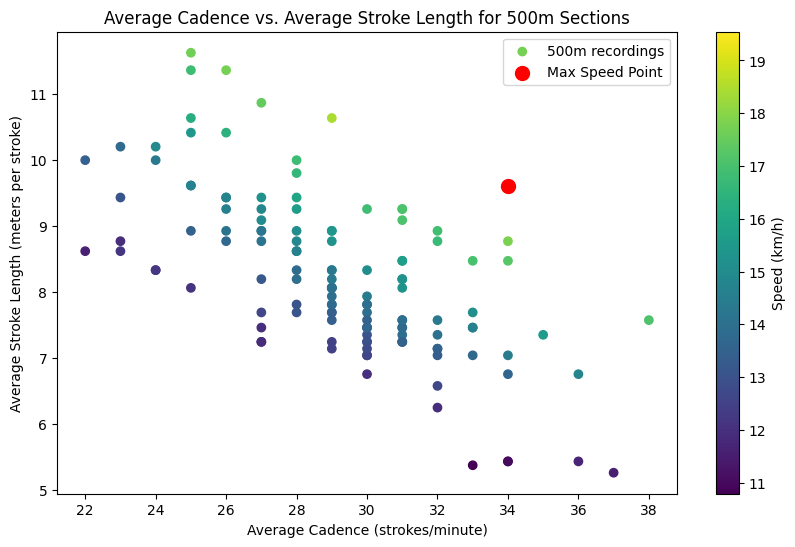

The maximum speed of 19.54 km/h is achieved at a cadence of 34.00 strokes/minute.
At this point, the average stroke length is 9.62 meters.


In [21]:
import matplotlib.pyplot as plt

# Step 1: Prepare the data for the plot
# X-axis: Average cadence for each 500m section
x_values = pd.concat([merged_series["split_spm_500m_1"], 
                      merged_series["split_spm_500m_2"], 
                      merged_series["split_spm_500m_3"], 
                      merged_series["split_spm_500m_4"]]).reset_index(drop=True)

# Y-axis: Average stroke length for each 500m section
y_values = pd.concat([merged_series["avg_stroke_length_500m_1"], 
                      merged_series["avg_stroke_length_500m_2"], 
                      merged_series["avg_stroke_length_500m_3"], 
                      merged_series["avg_stroke_length_500m_4"]]).reset_index(drop=True)

# Speed values for determining the maximum speed point
speed_values = pd.concat([merged_series["avg_speed_500m_1"], 
                          merged_series["avg_speed_500m_2"], 
                          merged_series["avg_speed_500m_3"], 
                          merged_series["avg_speed_500m_4"]]).reset_index(drop=True)

# Step 2: Create the plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, c=speed_values, cmap='viridis', label='500m recordings')
plt.colorbar(scatter, label='Speed (km/h)')

# Step 3: Find the point of maximum speed
max_speed_index = speed_values.idxmax()  # Find the index of the maximum speed
max_speed = speed_values.loc[max_speed_index]
max_cadence = x_values.loc[max_speed_index]
max_stroke_length = y_values.loc[max_speed_index]

# Highlight the point of maximum speed
plt.scatter(max_cadence, max_stroke_length, c='red', s=100, label='Max Speed Point', zorder=5)

# Step 4: Add labels and titles
plt.title('Average Cadence vs. Average Stroke Length for 500m Sections')
plt.xlabel('Average Cadence (strokes/minute)')
plt.ylabel('Average Stroke Length (meters per stroke)')
plt.legend()

# Display the plot
plt.show()

# Display information about the maximum speed point
print(f"The maximum speed of {max_speed:.2f} km/h is achieved at a cadence of {max_cadence:.2f} strokes/minute.")
print(f"At this point, the average stroke length is {max_stroke_length:.2f} meters.")


<div style="background-color:#e8e8e8; padding:15px; border-radius:10px; margin-top:20px;">
    <h3 style="color:darkblue; font-family:Verdana;">Additional Part: Calculations and Analysis</h3>
    <p>The following calculations have been made to provide additional insights into the rowing performance:</p>
    <ul>
        <li><strong>Correlation Analysis</strong>: Analyzed the relationship between total time, average stroke rate, average speed, and average stroke length to identify factors that influence performance.</li>
        <li><strong>Impact of Gender on Performance</strong>:
            <ul>
                <li>Three key metrics were compared: average speed, stroke rate, and completion time for 2000m, differentiated by gender.</li>
                <li>The analysis highlighted that male participants typically achieved higher average speeds and stroke rates, and took less time to complete the race.</li>
            </ul>
        </li>
        <li><strong>ANOVA and OLS Regression Analysis</strong>:
            <ul>
                <li>ANOVA showed a significant difference in average speed between genders, with a p-value of 0.014, indicating a statistically significant difference.</li>
                <li>The OLS regression analysis further confirmed this result, showing gender as an important factor affecting rowing speed.</li>
                <li>Additionally, participant type (amateur vs. competitor) was found to significantly influence speed. Amateur participants were slower compared to professional competitors.</li>
                <li>No significant interaction was found between gender and participant type in determining average speed.</li>
            </ul>
        </li>
        <li><strong>Machine Learning Model</strong>:
            <ul>
                <li>A linear regression model was trained to predict average speed based on average stroke rate and completion time for 2000m.</li>
                <li>The model had coefficients of [0.0347, -0.0284] and an intercept of 27.83, indicating that both stroke rate and completion time influenced rowing speed predictions.</li>
                <li>The Mean Squared Error (MSE) of the model on the test data was 0.0534, indicating good predictive performance.</li>
                <li>The Actual vs. Predicted Average Speed plot also showed that the model had a reasonable fit for the dataset.</li>
            </ul>
        </li>
    </ul>
</div>

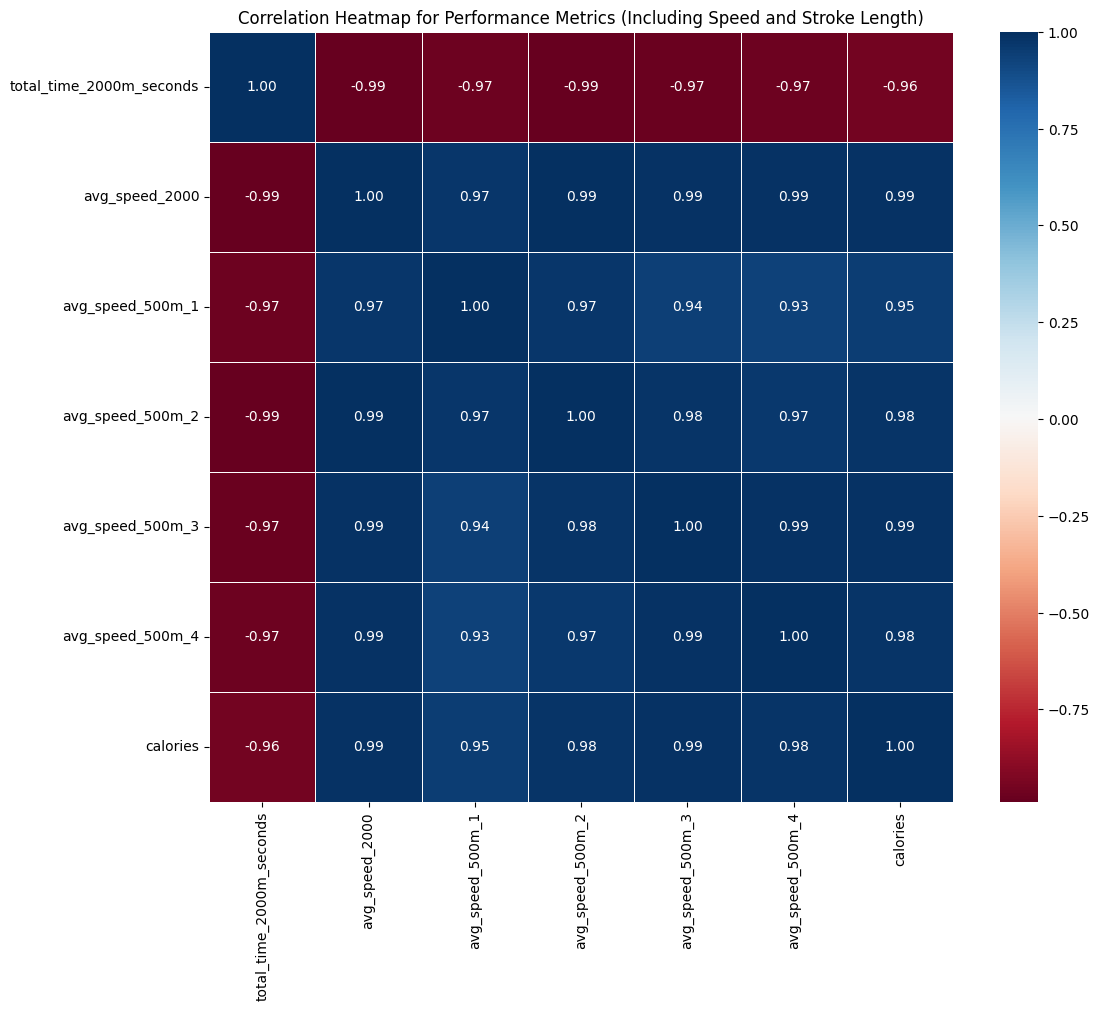

In [23]:
import seaborn as sns
import warnings

# Suppress the specific warning temporarily
warnings.filterwarnings("ignore", message="Format strings passed to MaskedConstant are ignored")

# Correlation Analysis

# Specify the list of numeric columns for correlation analysis with calculated metrics
numeric_columns = [
    'total_time_2000m_seconds',     # Total time taken in seconds for the 2000m race
    'avg_speed_2000',               # Average speed over the entire 2000m
    'avg_speed_500m_1',             # Average speed for each 500m section
    'avg_speed_500m_2',
    'avg_speed_500m_3',
    'avg_speed_500m_4',
    'calories'
]

# Convert these columns to numeric (handle errors by coercing to NaN)
merged_series[numeric_columns] = merged_series[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Create a DataFrame with only the selected columns for correlation analysis
numeric_df = merged_series[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap with adjusted formatting
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', linewidths=0.5)
plt.title("Correlation Heatmap for Performance Metrics (Including Speed and Stroke Length)")
plt.show()


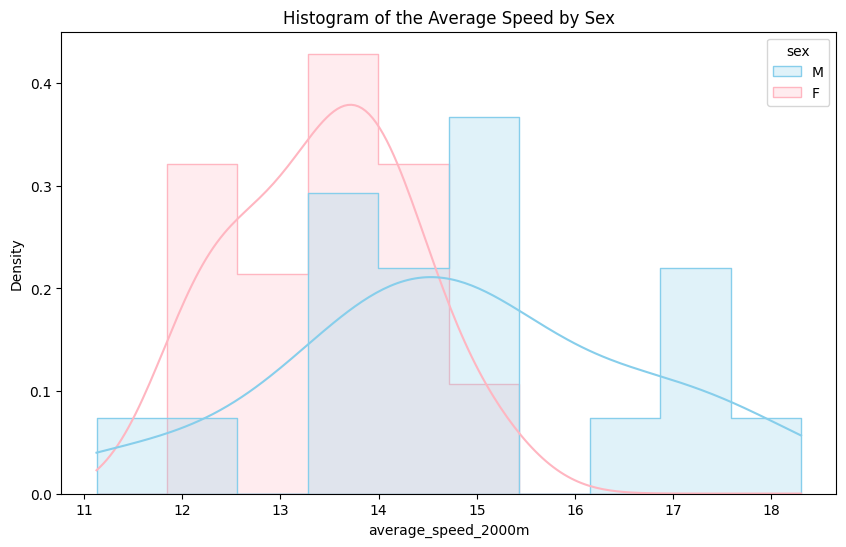

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the `sex` column based on the participant names in the `merged_series` dataframe
gender_dict = {
    'Maxime': 'M', 'Célestin': 'M', 'Julien': 'M', 'Neve': 'M', 'Eric': 'M', 'Edouard': 'M', 'Baptiste': 'M',
    'Loïs': 'M', 'Usama': 'M', 'Noé': 'M', 'Jacqueline': 'F', 'Emilien': 'M', 'Léa': 'F', 'Orlane': 'F',
    'Anaë': 'F', 'Tom': 'M', 'Alice': 'F', 'Ivan': 'M', 'Lison': 'F', 'Charlotte': 'F', 'Merle': 'F',
    'Léonore': 'F', 'Valérie': 'F', 'Amaury': 'M', 'Thomas': 'M', 'Jerome': 'M', 'Corentin': 'M',
    'Dominique': 'M', 'Nancy': 'F', 'Eloïse': 'F', 'Julie': 'F', 'Hervé': 'M'
}
merged_series['sex'] = merged_series['participant'].map(gender_dict)

# Creating a subset dataframe with relevant columns for analysis
df_analysis = merged_series[['participant', 'avg_speed_2000', 'avg_spm_2000m', 'total_time_2000m_seconds', 'sex']]
df_analysis = df_analysis.rename(columns={
    'avg_speed_2000': 'average_speed_2000m',
    'avg_spm_2000m': 'stroke_rate_spm',
    'total_time_2000m_seconds': 'total_time_seconds'
})

palette = {'M': 'skyblue', 'F': 'lightpink'}

# Check if the `sex` column was added correctly
if df_analysis['sex'].isnull().any():
    print("Warning: Some participants don't have a gender assigned. Please check the gender dictionary.")

plt.figure(figsize=(10, 6))
sns.histplot(data=df_analysis, x='average_speed_2000m', hue='sex', kde=True, bins=10, element='step', stat='density', common_norm=False, palette=palette)
plt.title('Histogram of the Average Speed by Sex')
plt.show()

<div style="background-color:#f9f9f9; padding:15px; border-radius:10px; margin-top:20px;">
    <h3 style="color:darkred; font-family:Verdana;">Comment:</h3>
    <p style="color:#333;">This histogram shows the distribution of average speeds by gender:</p>
    <ul style="color:#333;">
        <li>Each bar represents the number of participants in a speed range.</li>
        <li>The bars are colored: blue for men and pink for women.</li>
        <li>Density indicates the concentration of participants in each range.</li>
        <li>The higher the bar, the more participants there are in that speed range.</li>
    </ul>
</div>


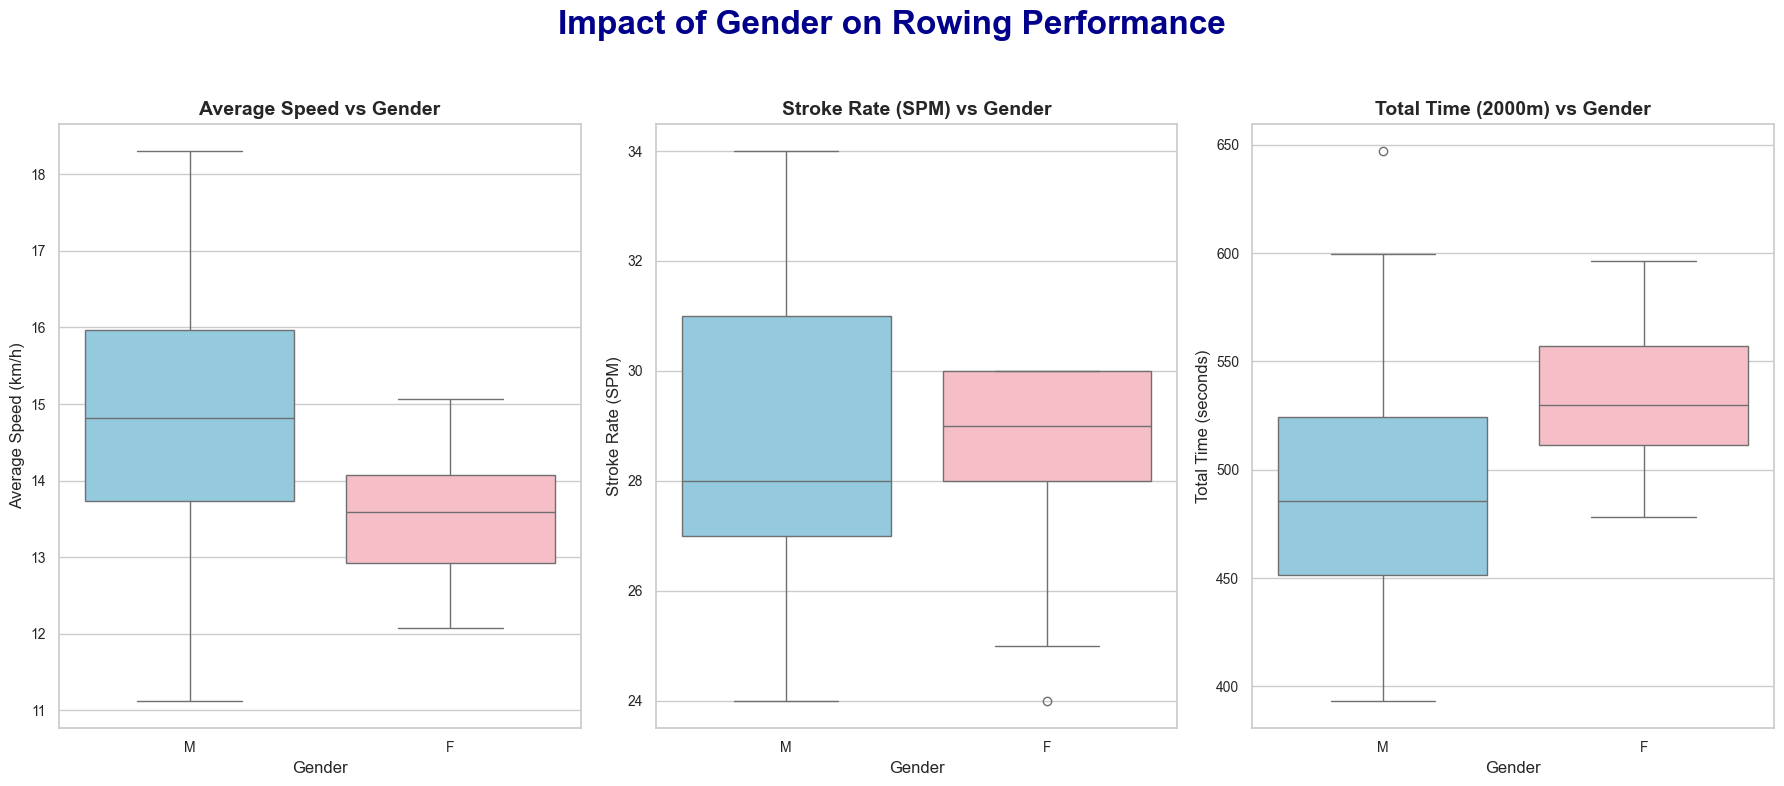

In [26]:

# Box plot comparing performance by gender
sns.set_theme(style="whitegrid")  # Set the theme for the plots

fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=False)


# Create box plots using `hue` instead of `palette`

# Gender vs Average Speed
sns.boxplot(x='sex', y='average_speed_2000m', data=df_analysis, ax=axes[0], hue='sex', palette=palette, dodge=False, legend=False)
axes[0].set_title("Average Speed vs Gender", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Gender", fontsize=12)
axes[0].set_ylabel("Average Speed (km/h)", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Gender vs Stroke Rate (SPM)
sns.boxplot(x='sex', y='stroke_rate_spm', data=df_analysis, ax=axes[1], hue='sex', palette=palette, dodge=False, legend=False)
axes[1].set_title("Stroke Rate (SPM) vs Gender", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Stroke Rate (SPM)", fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Gender vs Total Time for 2000m
sns.boxplot(x='sex', y='total_time_seconds', data=df_analysis, ax=axes[2], hue='sex', palette=palette, dodge=False, legend=False)
axes[2].set_title("Total Time (2000m) vs Gender", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Gender", fontsize=12)
axes[2].set_ylabel("Total Time (seconds)", fontsize=12)
axes[2].tick_params(axis='both', which='major', labelsize=10)

plt.suptitle("Impact of Gender on Rowing Performance", fontsize=24, fontweight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


<div style="background-color:#f9f9f9; padding:15px; border-radius:10px; margin-top:20px;">
    <h3 style="color:darkred; font-family:Verdana;">Comment:</h3>
    <p style="color:#333;">
        For amateur participants, men generally achieve faster speeds than women, as indicated by higher median and quartile values. Women also tend to take longer to complete the 2000m race.
    </p>
    <p style="color:#333;">
        To further analyze amateur performances and compare them with Olympic athletes, we referenced the 2000m rowing events from the 
        <a href="https://olympics.com/fr/paris-2024/rapports/aviron/skiff---femmes" style="color:darkred; text-decoration:none;">
        Skiff - Femmes Report</a> on the official Olympics website for Paris 2024.
    </p>      
    <p style="color:#333;">
        We focused on data such as average speed over 2000m, strokes per minute (spm), completion time, and gender. These details are compiled in the attached CSV file for further analysis.
    </p>
</div>


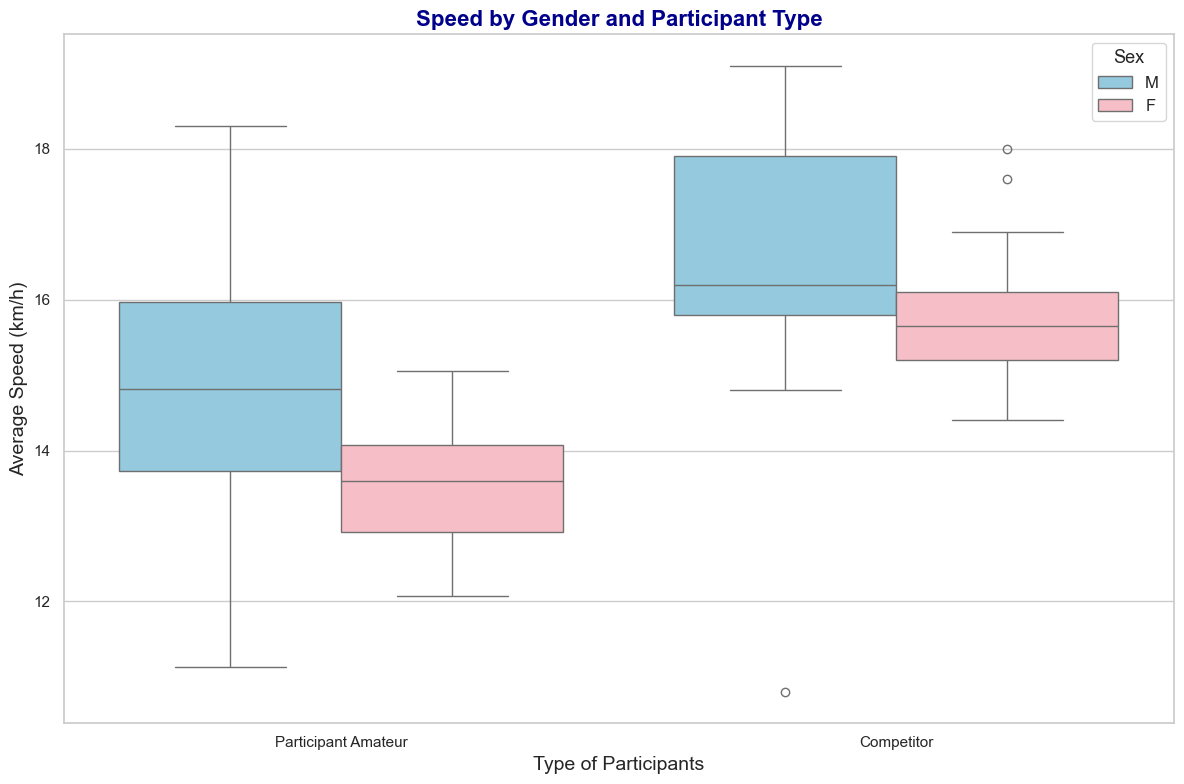


ANOVA Results:


,Source,Degrees of Freedom (df),Sum of Squares (sum_sq),Mean Square (mean_sq),F-statistic (F),p-value (PR(>F))
0,C(sex),1.0,10.326686,10.326686,4.640554,0.034996
1,C(type_participant),1.0,60.971187,60.971187,27.398922,0.000002
2,C(sex):C(type_participant),1.0,3.044613,3.044613,1.368173,0.246464
3,Residual,64.0,142.420054,2.225313,NaN,NaN



OLS Regression Results - Coefficients:


,,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,15.8111,0.352,44.968,0.000,15.109,16.514
1,C(sex)[T.M],0.5667,0.497,1.140,0.259,-0.427,1.560
2,C(type_participant)[T.Participant Amateur],-2.3767,0.543,-4.377,0.000,-3.461,-1.292
3,C(sex)[T.M]:C(type_participant)[T.Participant ...,0.8560,0.732,1.170,0.246,-0.606,2.318



OLS Regression Results - Summary:


,Dep. Variable:,average_speed_2000m,R-squared:,0.343
0,Model:,OLS,Adj. R-squared:,0.312
1,Method:,Least Squares,F-statistic:,11.14
2,Date:,"Sat, 26 Oct 2024",Prob (F-statistic):,5.66e-06
3,Time:,18:36:12,Log-Likelihood:,-121.62
4,No. Observations:,68,AIC:,251.2
5,Df Residuals:,64,BIC:,260.1
6,Df Model:,3,,
7,Covariance Type:,nonrobust,,


In [46]:
# Assigning participant type for amateur participants
df_analysis['type_participant'] = 'Participant Amateur'

# Load external dataset for comparison
external_data_path = '/Users/ecembayindir/Downloads/data_externes_avironxls.xlsx'
noc = pd.read_excel(external_data_path)

# Ensure the external data has consistent column names with `df_virtuel`
noc = noc.rename(columns={
    'average_speed_2000m': 'average_speed_2000m', 
    'spm': 'stroke_rate_spm', 
    'split_running_time': 'total_time_seconds',
    'sex': 'sex',  # Ensure the sex column is named consistently
    'type_participant': 'type_participant'  # Ensure participant type column is consistent
})
noc['type_participant'] = 'Competitor'

# Combine amateur participants with external data
df_concat = pd.concat([df_analysis, noc], axis=0, ignore_index=True)

# Box plot comparing speed by gender and participant type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type_participant', y='average_speed_2000m', hue='sex', data=df_concat, palette=palette)

# Setting plot title and labels
plt.title("Speed by Gender and Participant Type", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Type of Participants", fontsize=14)
plt.ylabel("Average Speed (km/h)", fontsize=14)
plt.legend(title="Sex", fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.show()

# Fit the OLS model for ANOVA
model = ols('average_speed_2000m ~ C(sex) * C(type_participant)', data=df_concat).fit()

# Perform ANOVA
anova_df = sm.stats.anova_lm(model, type=2)

# Convert ANOVA results to DataFrame for better display
anova_results_df = pd.DataFrame({
    'Source': ['C(sex)', 'C(type_participant)', 'C(sex):C(type_participant)', 'Residual'],
    'Degrees of Freedom (df)': anova_df['df'].tolist(),
    'Sum of Squares (sum_sq)': anova_df['sum_sq'].tolist(),
    'Mean Square (mean_sq)': anova_df['mean_sq'].tolist(),
    'F-statistic (F)': anova_df['F'].tolist(),
    'p-value (PR(>F))': anova_df['PR(>F)'].tolist()
})

# Display the ANOVA results as a DataFrame
print("\nANOVA Results:")
display(anova_results_df)

# OLS Regression Results Summary
ols_summary = model.summary()
ols_tables = ols_summary.tables

# Convert OLS summary tables into DataFrames for better readability
coef_table_data = ols_tables[1].data
coef_headers = coef_table_data[0]
coef_values = coef_table_data[1:]
coef_df = pd.DataFrame(coef_values, columns=coef_headers)

model_summary_data = ols_tables[0].data
model_summary_df = pd.DataFrame(model_summary_data[1:], columns=model_summary_data[0])

# Display OLS Regression Results - Coefficients and Summary
print("\nOLS Regression Results - Coefficients:")
display(coef_df)

print("\nOLS Regression Results - Summary:")
display(model_summary_df)


<div style="background-color:#f9f9f9; padding:15px; border-radius:10px; margin-top:20px;">
    <h3 style="color:darkred; font-family:Verdana;">Comment:</h3>
    <ul style="color:#333;">
        <li>Amateur participants have a lower speed compared to real competitors.</li>
        <li>At a 5% significance level, speed is influenced by the type of participant.</li>
        <li>Amateur participants have a speed that is 2.27 km/h lower than real competitors.</li>
        <li>There is no interaction effect between gender and type of participant.</li>
    </ul>
</div>


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing data: selecting features and target
X = merged_series[['avg_spm_2000m', 'total_time_2000m_seconds']].dropna()
y = merged_series['avg_speed_2000'].dropna()

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression().fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

# Displaying the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)


Coefficients: [ 0.03474387 -0.02843291]
Intercept: 27.831957657040135
Mean Squared Error: 0.05342860844023276


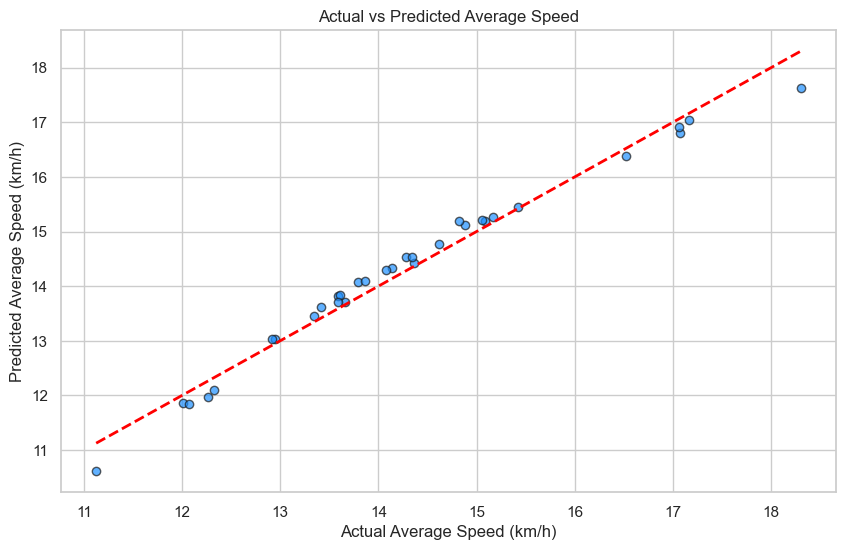

In [50]:
# Get predictions from the model
y_pred = model.predict(X)

# Plot Actual vs Predicted Average Speeds
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Average Speed (km/h)")
plt.ylabel("Predicted Average Speed (km/h)")
plt.title("Actual vs Predicted Average Speed")
plt.grid(True)
plt.show()

<div style="background-color:#f9f9f9; padding:15px; border-radius:10px; margin-top:20px;">
    <h3 style="color:darkred; font-family:Verdana;">Comment:</h3>
    <ul style="color:#333;">
        <li>The linear model is used to predict the average speed based on the average stroke rate (SPM) and total time for 2000m.</li>
        <li>The coefficients of the model are:
            <ul>
                <li>Stroke Rate (SPM) Coefficient: <strong>0.0347</strong> - This indicates that, on average, for each unit increase in stroke rate, the average speed increases by <strong>0.0347 km/h</strong>.</li>
                <li>Total Time for 2000m Coefficient: <strong>-0.0284</strong> - This indicates that, on average, for each additional second taken to complete the 2000m, the average speed decreases by <strong>0.0284 km/h</strong>.</li>
            </ul>
        </li>
        <li>The intercept of the model is <strong>27.83</strong>, representing the estimated average speed when both predictors (stroke rate and total time) are zero.</li>
        <li>The model's performance was evaluated using the Mean Squared Error (MSE), which was calculated to be <strong>0.0534</strong>. This value represents the average squared difference between actual and predicted average speeds. A lower MSE indicates better performance of the model.</li>
    </ul>
</div>


### To export the dataframes:

-The main dataframe used for the analysis
merged_series.to_csv('/Users/ecembayindir/Desktop/pythonProject/Sorbonne_Python_Project_2024/rowers-analysis/merged_series_data.csv', index=False)
print("Main data has been successfully exported to 'merged_series_data.csv'")

-ANOVA results DataFrame
anova_results_df.to_csv('/Users/ecembayindir/Desktop/pythonProject/Sorbonne_Python_Project_2024/rowers-analysis/anova_results.csv', index=False)
print("ANOVA results have been successfully exported to 'anova_results.csv'")

-OLS Coefficients DataFrame
coef_df.to_csv('/Users/ecembayindir/Desktop/pythonProject/Sorbonne_Python_Project_2024/rowers-analysis/ols_coefficients.csv', index=False)
print("OLS coefficients have been successfully exported to 'ols_coefficients.csv'")

-OLS Summary DataFrame
model_summary_df.to_csv('/Users/ecembayindir/Desktop/pythonProject/Sorbonne_Python_Project_2024/rowers-analysis/ols_summary.csv', index=False)
print("OLS summary has been successfully exported to 'ols_summary.csv'")